In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gmaps
import scipy.stats as stats

Data_Files =pd.read_csv("survey_results_public.csv", encoding ='utf-8')

Education_df = Data_Files

Education_df.head(5)


/Users/marylugranja/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


# Data Cleaning
Cleaned up the following fields by shortening labels in Formal_Education and Undergraduated Majors. Also bucked Gender into 3 categories.  
NAs were removed as needed

In [2]:
Education_df['FormalEducation'] = Education_df['FormalEducation'].replace({"Professional degree (JD, MD, etc.)": "Professional Degree",
                                                                          "Bachelor’s degree (BA, BS, B.Eng., etc.)": "Bachelor’s Degree",
                                                                          "Master’s degree (MA, MS, M.Eng., MBA, etc.)" : "Master's Degree",
                                                                        "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)":"Secondary School",
                                                                           "Associate degree" : "Associate Degree",
                                                                          "Other doctoral degree (Ph.D, Ed.D., etc.)": "Other Doctoral Degree", 
                                                                           "I never completed any formal education": "Never Completed Any Formal Education",
                                                                          "Primary/elementary school": "Elementary school",
                                                                          "Some college/university study without earning a degree":"Some College/University Study"})
                           

#Education_df['FormalEducation'].count()
Education_df['FormalEducation'].value_counts()



Bachelor’s Degree                       43659
Master's Degree                         21396
Some College/University Study           11710
Secondary School                         8951
Associate Degree                         2970
Other Doctoral Degree                    2214
Elementary school                        1656
Professional Degree                      1447
Never Completed Any Formal Education      700
Name: FormalEducation, dtype: int64

In [3]:
Education_df['UndergradMajor'] = Education_df['UndergradMajor'].replace({"A health science (ex. nursing, pharmacy, radiology)": "Health Science",
                                                                          "Fine arts or performing arts (ex. graphic design, music, studio art)": "Fine Arts/Performing Arts",
                                                                          "A social science (ex. anthropology, psychology, political science)" : "Social Science",
                                                                        "A humanities discipline (ex. literature, history, philosophy)":"Humanities Discipline",
                                                                           "A business discipline (ex. accounting, finance, marketing)" : "Business Discipline",
                                                                          "Mathematics or statistics": "Mathematics or statistics", 
                                                                           "A natural science (ex. biology, chemistry, physics)": "Natural Science",
                                                                          "Information systems, information technology, or system administration": "Information Systems/Information Technology",
                                                                          "Another engineering discipline (ex. civil, electrical, mechanical)":"Another Engineering Discipline",
                                                                        "Computer science, computer engineering, or software engineering": "Computer Science/Computer Engineering"})
                           

#Education_df['UndergradMajor'].count()
Education_df['UndergradMajor'].value_counts()


Computer Science/Computer Engineering         50336
Another Engineering Discipline                 6945
Information Systems/Information Technology     6507
Natural Science                                3050
Mathematics or statistics                      2818
Web development or web design                  2418
Business Discipline                            1921
Humanities Discipline                          1590
Social Science                                 1377
Fine Arts/Performing Arts                      1135
I never declared a major                        693
Health Science                                  246
Name: UndergradMajor, dtype: int64

In [4]:
Education_df['Gender'] = Education_df['Gender'].replace({"Non-binary, genderqueer, or gender non-conforming":"Other / Non-Disclosed","Female;Transgender":"Female",\
                                                        "Male;Non-binary, genderqueer, or gender non-conforming":"Male","Transgender":"Other / Non-Disclosed","Female;Male":"Other / Non-Disclosed",\
                                                        "Transgender;Non-binary, genderqueer, or gender non-conforming":"Other / Non-Disclosed","Female;Non-binary, genderqueer, or gender non-conforming":"Female",\
                                                         "Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming":"Other / Non-Disclosed","Male;Transgender":"Male","Female;Transgender;Non-binary, genderqueer, or gender non-conforming":"Female",\
                                                         "Female;Male;Transgender":"Other / Non-Disclosed","Male;Transgender;Non-binary, genderqueer, or gender non-conforming":"Male",\
                                                        "Female;Male;Non-binary, genderqueer, or gender non-conforming":"Other / Non-Disclosed"})

Education_df['Gender'].value_counts()




Male                     59620
Female                    4244
Other / Non-Disclosed      605
Name: Gender, dtype: int64

# Formal Education

In [5]:
FE_Gender_df_temp = Education_df.loc[:,["FormalEducation","Gender","Respondent"]]
FE_Gender_df = FE_Gender_df_temp.dropna()
FE_Gender_df["FormalEducation"].count()


Count_Gender= FE_Gender_df["Gender"].value_counts()
Gender_df=pd.DataFrame(Count_Gender)
Tot= Count_Gender.sum()
Gender_df["Percentage Of Developers"]=round(Count_Gender*100/Tot,2)
Gender_df


,Gender,Percentage Of Developers
Male,58603,92.51
Female,4157,6.56
Other / Non-Disclosed,586,0.93


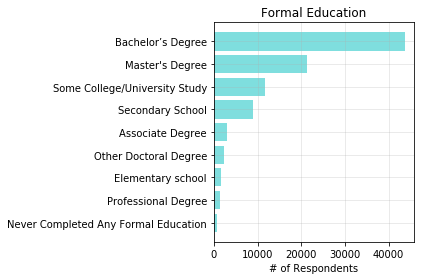

Total Formal Education responses: 94703


,Labels,Values,% of Respondents
Bachelor’s Degree,Bachelor’s Degree,43659,46.10
Master's Degree,Master's Degree,21396,22.59
Some College/University Study,Some College/University Study,11710,12.36
Secondary School,Secondary School,8951,9.45
Associate Degree,Associate Degree,2970,3.14
Other Doctoral Degree,Other Doctoral Degree,2214,2.34
Elementary school,Elementary school,1656,1.75
Professional Degree,Professional Degree,1447,1.53
Never Completed Any Formal Education,Never Completed Any Formal Education,700,0.74


In [6]:
formaleducation_temp = Education_df[['Respondent','FormalEducation']]
formaleducation = formaleducation_temp.dropna()

formaleducation_count = formaleducation['FormalEducation'].value_counts()
Per_Total = round(((formaleducation_count/formaleducation_count.sum())*100),2)

formaleducation_df = pd.DataFrame({'Labels' : formaleducation_count.index,
                            'Values' : formaleducation_count.values,
                             "% of Respondents" : Per_Total      
})

plt.barh(formaleducation_df['Labels'], formaleducation_df['Values'], color='c', alpha=0.5, align="center")
plt.gca().invert_yaxis()
plt.grid(alpha = 0.33)
plt.title("Formal Education")
plt.xlabel("# of Respondents")
plt.tight_layout()
plt.savefig("Images/Formal_Education.png")
plt.show()

print(f"Total Formal Education responses: {formaleducation_count.sum()}")


formaleducation_df

In [7]:
# FE_Female_df_temp = FE_Gender_df.loc[FE_Gender_df["Gender"]=="Female",:]
# FE_Female_df = FE_Female_df_temp.dropna()

# FE_Female_df_count = FE_Female_df['FormalEducation'].value_counts()
# Per_Female = round(((FE_Female_df_count/FE_Female_df_count.sum())*100),2)

# FE_Female_df = pd.DataFrame({'Labels' : FE_Female_df_count.index,
#                             'Female_Values' : FE_Female_df_count.values,
#                              "% of Respondents" : Per_Female
# })

# plt.barh(FE_Female_df['Labels'],FE_Female_df['Female_Values'], color='hotpink', alpha=0.5, align="center")
# plt.gca().invert_yaxis()
# plt.grid(alpha = 0.33)
# plt.title("Formal Education (Female)")
# plt.xlabel("# of Respondents")
# plt.tight_layout()
# plt.savefig("Images/Formal_Education_Female.png")
# plt.show()

# print(f"Total Formal Education responses: {FE_Female_df_count.sum()}")


# FE_Female_df




In [8]:
# FE_Male_df_temp = FE_Gender_df.loc[FE_Gender_df["Gender"]=="Male",:]
# FE_Male_df = FE_Male_df_temp.dropna()

# FE_Male_df_count = FE_Male_df['FormalEducation'].value_counts()
# Per_Male = round(((FE_Male_df_count/FE_Male_df_count.sum())*100),2)


# FE_Male_df = pd.DataFrame({'Labels' : FE_Male_df_count.index,
#                             'Male_Values' : FE_Male_df_count.values,
#                            "% of Respondents" : Per_Male
                           
# })

# plt.barh(FE_Male_df['Labels'],FE_Male_df['Male_Values'], color='blue', alpha=0.5, align="center")
# plt.gca().invert_yaxis()
# plt.grid(alpha = 0.33)
# plt.title("Formal Education (Male)")
# plt.xlabel("# of Respondents")
# plt.tight_layout()
# plt.savefig("Images/Formal_Education_Male.png")
# plt.show()

# print(f"Total Formal Education responses: {FE_Male_df_count.sum()}")
# FE_Male_df

In [9]:
# FE_Other_df_temp = FE_Gender_df.loc[FE_Gender_df["Gender"]=="Other / Non-Disclosed",:]
# FE_Other_df = FE_Other_df_temp.dropna()

# FE_Other_df_count = FE_Other_df['FormalEducation'].value_counts()
# Per_Other = round(((FE_Other_df_count/FE_Other_df_count.sum())*100),2)


# FE_Other_df = pd.DataFrame({'Labels' : FE_Other_df_count.index,
#                             'Values' : FE_Other_df_count.values,
#                             "% of Respondents" : Per_Other
# })

# plt.barh(FE_Other_df['Labels'],FE_Other_df['Values'], color='green', alpha=0.5, align="center")
# plt.gca().invert_yaxis()
# plt.grid(alpha = 0.33)
# plt.title("Formal Education (Other)")
# plt.xlabel("# of Respondents")
# plt.tight_layout()
# plt.savefig("Images/Formal_Education_Other.png")
# plt.show()

# print(f"Total Formal Education responses: {FE_Other_df_count.sum()}")
# FE_Other_df

In [10]:
# plt.barh(FE_Male_df['Labels'],FE_Male_df['Male_Values'])
# plt.barh(FE_Female_df['Labels'],FE_Female_df['Female_Values'],color="pink")
# plt.barh(FE_Other_df['Labels'],FE_Other_df['Values'],color="green")
# plt.grid(alpha = 0.33)
# plt.gca().invert_yaxis()
# plt.xticks(rotation=75)
# plt.title("Formal Education by Gender")
# plt.xlabel("# of Respondents")
# plt.savefig("Images/Formal_Education_by_gender_all.png")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

In [11]:
# FE_pivot_df_temp = FE_Gender_df
# FE_pivot_df = FE_pivot_df_temp.dropna()

# FE_pivot_df2 = pd.DataFrame(np.random.rand(10, 2), columns=['FormalEducation', 'Gender'])

# FE_pivot_df2.plot.bar();
# plt.show()

In [12]:
# FormalEducation_df = Education_df.groupby('FormalEducation')
# FormalEducation_Count = FormalEducation_df['FormalEducation'].count()
# FormalEducation_sum = FormalEducation_df["FormalEducation"].sum()
# Total_Responses = Education_df['FormalEducation'].count()

# summary_table = pd.DataFrame({"FormalEducation_Count": (FormalEducation_Count)
#                                                       })

# summary_table
# summary_table_reset = summary_table.reset_index()
# summary_sorted = summary_table_reset.sort_values("FormalEducation_Count", ascending = True)
# summary_sorted

In [13]:

# users = summary_sorted["FormalEducation_Count"]
# x_axis = summary_sorted["FormalEducation"]
# plt.barh(x_axis, users, color='blue', alpha=0.5, align="center",)
# #plt.xticks(rotation=90)
# plt.title("Formal Education")
# plt.xlabel("# of Respondents")
# plt.grid(alpha = .25)
# #plt.savefig("../Images/sin_cos_with_markers.png")
# #plt.ylabel("Number of People Using Programming Languages")
# plt.show()#
 

# print(f"Total Responses : {Total_Responses}")


# UnderGraduate_Majors

In [14]:
Under_Gender_df_temp = Education_df.loc[:,["UndergradMajor","Gender","Respondent"]]
Under_Gender_df = Under_Gender_df_temp.dropna()
Under_Gender_df["UndergradMajor"].count()


# Count_Gender= Under_Gender_df["Gender"].value_counts()
# Gender_df=pd.DataFrame(Count_Gender)
# Tot= Count_Gender.sum()
# Gender_df["Percentage Of Developers"]=round(Count_Gender*100/Tot,2)
# Gender_df



55173

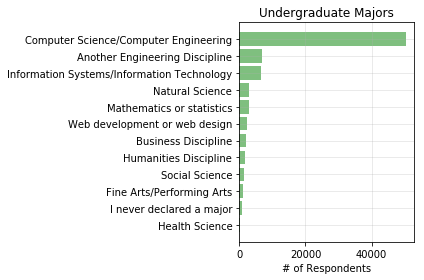

Total Undergraduate Major responses: 79036


,Labels,Values,% of Respondents
Computer Science/Computer Engineering,Computer Science/Computer Engineering,50336,63.69
Another Engineering Discipline,Another Engineering Discipline,6945,8.79
Information Systems/Information Technology,Information Systems/Information Technology,6507,8.23
Natural Science,Natural Science,3050,3.86
Mathematics or statistics,Mathematics or statistics,2818,3.57
Web development or web design,Web development or web design,2418,3.06
Business Discipline,Business Discipline,1921,2.43
Humanities Discipline,Humanities Discipline,1590,2.01
Social Science,Social Science,1377,1.74
Fine Arts/Performing Arts,Fine Arts/Performing Arts,1135,1.44


In [15]:
UndergradMajor_temp = Education_df[['Respondent','UndergradMajor']]
UndergradMajor = UndergradMajor_temp.dropna()

UndergradMajor_count = UndergradMajor['UndergradMajor'].value_counts()
Per_All = round(((UndergradMajor_count/UndergradMajor_count.sum())*100),2)

UndergradMajor_df = pd.DataFrame({'Labels' : UndergradMajor_count.index,
                            'Values' : UndergradMajor_count.values,
                                  '% of Respondents' : Per_All
})


plt.barh(UndergradMajor_df['Labels'], UndergradMajor_df['Values'], color='green', alpha=0.5, align="center")
plt.gca().invert_yaxis()
plt.grid(alpha = 0.33)
plt.title("Undergraduate Majors")
plt.xlabel("# of Respondents")
plt.tight_layout()
plt.savefig("Images/Undergraduate_Majors.png")
plt.show()

print(f"Total Undergraduate Major responses: {UndergradMajor_count.sum()}")
UndergradMajor_df

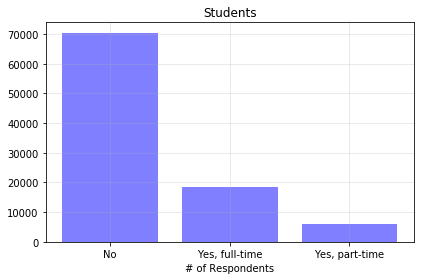

Total Student Responses: 94901


,Labels,Values,% of Respondents
No,No,70399,74.18
"Yes, full-time","Yes, full-time",18394,19.38
"Yes, part-time","Yes, part-time",6108,6.44


In [16]:
student_temp = Education_df[['Respondent','Student']]
student = student_temp.dropna()

student_count = student['Student'].value_counts()
Student_Per = round(((student_count/student_count.sum())*100),2)

student_df = pd.DataFrame({'Labels' : student_count.index,
                            'Values' : student_count.values,
                           "% of Respondents" : Student_Per
})


plt.bar(student_df['Labels'], student_df['Values'], color='blue', alpha=0.5, align="center")
plt.grid(alpha = 0.33)
plt.title("Students")
plt.xlabel("# of Respondents")
plt.tight_layout()
plt.savefig("Images/Students.png")
plt.show()

print(f"Total Student Responses: {student_count.sum()}")
student_df

In [17]:
# Hobby_Yes_df = Education_df.loc[Education_df["Hobby"] == "Yes", :]
# Hobby_No_df = Education_df.loc[Education_df["Hobby"] == "No", :]
# No_count = Hobby_No_df['Hobby'].count()
# Yes_count = Hobby_Yes_df['Hobby'].count()

# labels = ["Yes", "No"]

# # The values of each section of the pie chart
# sizes = [Yes_count, No_count]

# # The colors of each section of the pie chart
# colors = ["plum", "m"]


# plt.pie(sizes, labels=labels, colors=colors,  autopct="%1.1f%%", shadow=True, startangle=270, )
# plt.title("% of Developers that Code as a Hobby")

# # Save Figure
# plt.savefig("Images/Hobby_Percentage.png")
# plt.show



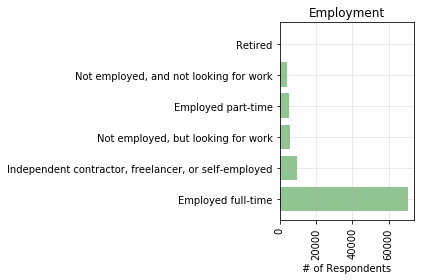

Total Employment Responses: 95321


,Labels,Values,% of Respondents
Employed full-time,Employed full-time,70495,73.96
"Independent contractor, freelancer, or self-employed","Independent contractor, freelancer, or self-em...",9282,9.74
"Not employed, but looking for work","Not employed, but looking for work",5805,6.09
Employed part-time,Employed part-time,5380,5.64
"Not employed, and not looking for work","Not employed, and not looking for work",4132,4.33
Retired,Retired,227,0.24


In [18]:
Employment_temp = Education_df[['Respondent','Employment']]
Employment = Employment_temp.dropna()

Employment_count = Employment['Employment'].value_counts()
Employment_Per = round(((Employment_count/Employment_count.sum())*100),2)

Employment_df = pd.DataFrame({'Labels' : Employment_count.index,
                            'Values' : Employment_count.values,
                              '% of Respondents' : Employment_Per
})


plt.barh(Employment_df['Labels'], Employment_df['Values'], color='forestgreen', alpha=0.5,align="center")
plt.grid(alpha = 0.33)
plt.title("Employment")
plt.xticks(rotation=90)
plt.xlabel("# of Respondents")
plt.tight_layout()
plt.savefig("Images/Employment.png")
plt.show()

print(f"Total Employment Responses: {Employment_count.sum()}")
Employment_df

In [19]:
# HopeFiveYears_temp = Education_df[['Respondent','HopeFiveYears']]
# HopeFiveYears = HopeFiveYears_temp.dropna()

# HopeFiveYears_count = HopeFiveYears['HopeFiveYears'].value_counts()


# HopeFiveYears_df = pd.DataFrame({'Labels' : HopeFiveYears_count.index,
#                             'Values' : HopeFiveYears_count.values   
# })


# plt.barh(HopeFiveYears_df['Labels'], HopeFiveYears_df['Values'], color='orchid', alpha=0.5, align="center")
# plt.grid(alpha = 0.33)
# plt.title("Hope Five Years")
# plt.xlabel("# of Respondents")
# plt.tight_layout()
# plt.savefig("Images/Hope_Five_Years.png")

# plt.show()

# print(f"Total Hope Five Years Responses: {HopeFiveYears_count.sum()}")
# HopeFiveYears_df

# Career Satisfaction

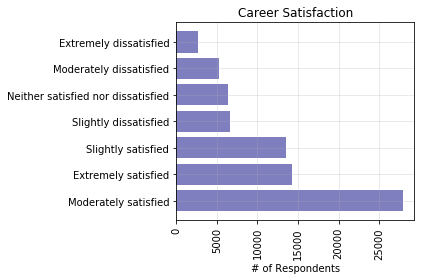

Total Career Satisfaction Responses: 76504


,Labels,Values,% of Respondents
Moderately satisfied,Moderately satisfied,27926,36.50
Extremely satisfied,Extremely satisfied,14316,18.71
Slightly satisfied,Slightly satisfied,13484,17.63
Slightly dissatisfied,Slightly dissatisfied,6587,8.61
Neither satisfied nor dissatisfied,Neither satisfied nor dissatisfied,6316,8.26
Moderately dissatisfied,Moderately dissatisfied,5262,6.88
Extremely dissatisfied,Extremely dissatisfied,2613,3.42


In [20]:
CareerSat_temp = Education_df[['Respondent','CareerSatisfaction']]
CareerSat = CareerSat_temp.dropna()

CareerSat_count = CareerSat['CareerSatisfaction'].value_counts()
CareerSat_Per = round(((CareerSat_count/CareerSat_count.sum())*100),2)

CareerSat_df = pd.DataFrame({'Labels' : CareerSat_count.index,
                            'Values' : CareerSat_count.values,
                             '% of Respondents' : CareerSat_Per
})


plt.barh(CareerSat_df['Labels'], CareerSat_df['Values'], color='navy', alpha=0.5, align="center")
plt.grid(alpha = 0.33)
plt.title("Career Satisfaction")
plt.xlabel("# of Respondents")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("Images/Career_Satisfaction.png")
plt.show()

print(f"Total Career Satisfaction Responses: {CareerSat_count.sum()}")
CareerSat_df

In [21]:
# CareerSatisfaction_df = Education_df
# CareerSatisfaction_df["Ratings"] = ""
# CareerSatisfaction_df["Hobby_convert"] = ""


# def label_rating (row):
#       if row["CareerSatisfaction"] == "Extremely dissatisfied":
#         return 1
#       if row["CareerSatisfaction"] == "Extremely satisfied":
#         return 7
#       if row["CareerSatisfaction"] == "Moderately dissatisfied":
#         return 2
#       if row["CareerSatisfaction"] == "Moderately satisfied":
#         return 6
#       if row["CareerSatisfaction"] == "Neither satisfied nor dissatisfied":
#         return 3
#       if row["CareerSatisfaction"] == "Slightly dissatisfied":
#         return 4
#       if row["CareerSatisfaction"] == "Slightly satisfied":
#         return 5
#       return 0

# CareerSatisfaction_df["Ratings"] = CareerSatisfaction_df.apply(lambda row: label_rating(row), axis=1)

# def label_hobby (row):
#       if row["Hobby"] == "Yes":
#         return 1
#       if row["Hobby"] == "No":
#         return 2
#       return 0
    
# CareerSatisfaction_df["Hobby_convert"] = CareerSatisfaction_df.apply(lambda row: label_hobby(row), axis=1)    

# CareerSatisfaction_clean_temp = CareerSatisfaction_df
# CareerSatisfaction_clean = CareerSatisfaction_clean_temp.dropna(subset=['CareerSatisfaction'], how='all')


In [22]:
# CS_Anova_df = CareerSatisfaction_clean[['Respondent','Ratings', 'Hobby_convert']]


In [23]:
# CS_group = CS_Anova_df["Ratings"].value_counts()
# CS_group

In [24]:
# group1 = CS_Anova_df[CS_Anova_df["Hobby_convert"] == 1]["Ratings"]
# group2 = CS_Anova_df[CS_Anova_df["Hobby_convert"] == 2]["Ratings"]


# stats.f_oneway(group1, group2)

In [25]:
# CS_Anova_df.boxplot("Ratings", by="Hobby_convert", figsize=(20, 10))
# plt.savefig("Images/Hobby_CSat.png")

# Career Satisfaction by Gender

In [26]:
# CS_Gender_df_temp = Education_df.loc[:,["CareerSatisfaction","Gender","Respondent"]]
# CS_Gender_df = CS_Gender_df_temp.dropna()
# CS_Gender_df["CareerSatisfaction"].count()


# Count_Gender= CS_Gender_df["CareerSatisfaction"].value_counts()
# Gender_df=pd.DataFrame(Count_Gender)
# Tot= Count_Gender.sum()
# Gender_df["Percentage Of Developers"]=round(Count_Gender*100/Tot,2)
# Gender_df

In [27]:
# CS_Female_df_temp = CS_Gender_df.loc[CS_Gender_df["Gender"]=="Female",:]
# CS_Female_df = CS_Female_df_temp.dropna()

# CS_Female_df_count = CS_Female_df['CareerSatisfaction'].value_counts()
# CS_Per_Female = round(((CS_Female_df_count/CS_Female_df_count.sum())*100),2)

# CS_Female_df = pd.DataFrame({'Labels' : CS_Female_df_count.index,
#                             'Values' : CS_Female_df_count.values,
#                              "% of Respondents" : CS_Per_Female
# })

# plt.barh(CS_Female_df['Labels'],CS_Female_df['Values'], color='hotpink', alpha=0.5, align="center")
# plt.gca().invert_yaxis()
# plt.grid(alpha = 0.33)
# plt.title("Career Satisfaction (Female)")
# plt.xlabel("# of Respondents")
# plt.tight_layout()
# plt.savefig("Images/CareerSatisfaction_Female.png")
# plt.show()

# print(f"Total Career Satisfaction responses: {CS_Female_df_count.sum()}")


# CS_Female_df


In [28]:
# CS_Male_df_temp = CS_Gender_df.loc[CS_Gender_df["Gender"]=="Male",:]
# CS_Male_df = CS_Male_df_temp.dropna()

# CS_Male_df_count = CS_Male_df['CareerSatisfaction'].value_counts()
# CS_Per_Male = round(((CS_Male_df_count/CS_Male_df_count.sum())*100),2)

# CS_Male_df = pd.DataFrame({'Labels' : CS_Male_df_count.index,
#                             'Values' : CS_Male_df_count.values,
#                              "% of Respondents" : CS_Per_Male
# })

# plt.barh(CS_Male_df['Labels'],CS_Male_df['Values'], color='mediumblue', alpha=0.5, align="center")
# plt.gca().invert_yaxis()
# plt.grid(alpha = 0.33)
# plt.title("Career Satisfaction (Male)")
# plt.xlabel("# of Respondents")
# plt.tight_layout()
# plt.savefig("Images/CareerSatisfaction_Male.png")
# plt.show()

# print(f"Total Career Satifaction responses: {CS_Male_df_count.sum()}")


# CS_Male_df

In [29]:
# CS_Other_df_temp = CS_Gender_df.loc[CS_Gender_df["Gender"]=="Other / Non-Disclosed",:]
# CS_Other_df = CS_Other_df_temp.dropna()

# CS_Other_df_count = CS_Other_df['CareerSatisfaction'].value_counts()
# CS_Per_Other = round(((CS_Other_df_count/CS_Other_df_count.sum())*100),2)

# CS_Other_df = pd.DataFrame({'Labels' : CS_Other_df_count.index,
#                             'Values' : CS_Other_df_count.values,
#                              "% of Respondents" : CS_Per_Other
# })

# plt.barh(CS_Other_df['Labels'],CS_Other_df['Values'], color='orange', alpha=0.5, align="center")
# plt.gca().invert_yaxis()
# plt.grid(alpha = 0.33)
# plt.title("Career Satisfaction (Other)")
# plt.xlabel("# of Respondents")
# plt.tight_layout()
# plt.savefig("Images/CareerSatisfaction_Other.png")
# plt.show()

# print(f"Total Career Satifaction responses: {CS_Other_df_count.sum()}")


# CS_Other_df

In [30]:
# plt.barh(CS_Male_df['Labels'],CS_Male_df['Values'])
# plt.barh(CS_Female_df['Labels'],CS_Female_df['Values'],color="magenta")
# plt.barh(CS_Other_df['Labels'],CS_Other_df['Values'],color="limegreen")
# plt.grid(alpha = 0.33)
# #plt.gca().invert_yaxis()
# #plt.xticks(rotation=75)
# plt.title("Career Satisfaction by Gender")
# plt.xlabel("# of Respondents")
# plt.tight_layout()
# plt.savefig("Images/CareerSatisfaction_by_gender_all.png")
# plt.show

In [31]:
# bootcamp_temp = Education_df[['Respondent','TimeAfterBootcamp']]
# bootcamp = bootcamp_temp.dropna()

# bootcamp_count = bootcamp['TimeAfterBootcamp'].value_counts()

# bootcamp_df = pd.DataFrame({'Labels' : bootcamp_count.index,
#                             'Values' : bootcamp_count.values   
# })

# bootcamp_df['Labels'] = bootcamp_df['Labels'].replace({"I already had a full-time job as a developer when I began the program": "Already a full-time developer"})


# plt.barh(bootcamp_df['Labels'], bootcamp_df['Values'], color='orange', alpha=0.5, align="center")
# #plt.gca().invert_yaxis()
# plt.grid(alpha = .25)
# plt.xticks(rotation=75)
# plt.title("Time After BootCamp")
# plt.xlabel("# of Respondents")
# plt.tight_layout()
# plt.savefig("Images/Time_After_BootCamp.png")
# plt.show()

# print(f"Total TimeAfterBootcamp responses: {bootcamp_count.sum()}")
# bootcamp_df

In [32]:
# Hobby_Gender_df_temp = Education_df.loc[:,["Hobby","Gender","Respondent"]]
# Hobby_Gender_df = Hobby_Gender_df_temp.dropna()
# Hobby_Gender_df["Hobby"].count()


# Count_Gender= Hobby_Gender_df["Hobby"].value_counts()
# Gender_df=pd.DataFrame(Count_Gender)
# Tot= Count_Gender.sum()
# Gender_df["Percentage Of Respondents"]=round(Count_Gender*100/Tot,2)
# Gender_df

In [33]:
# Hobby_Female_df_temp = Hobby_Gender_df.loc[Hobby_Gender_df["Gender"]=="Female",:]
# Hobby_Female_df = Hobby_Female_df_temp.dropna()

# Hobby_Female_df_count = Hobby_Female_df['Hobby'].value_counts()
# Hobby_Per_Female = round(((Hobby_Female_df_count/Hobby_Female_df_count.sum())*100),2)

# Hobby_Female_df = pd.DataFrame({'Labels' : Hobby_Female_df_count.index,
#                             'Female_Values' : Hobby_Female_df_count.values,
#                              "% of Respondents" : Hobby_Per_Female
# })

# plt.bar(Hobby_Female_df['Labels'],Hobby_Female_df['Female_Values'], color='pink', alpha=0.5, align="center")

# plt.grid(alpha = 0.33)
# plt.title("Hobby (Female)")
# plt.xlabel("# of Respondents")
# plt.savefig("Images/Hobby_Female_Other.png")
# plt.show()

# print(f"Total Hobby responses: {Hobby_Female_df_count.sum()}")


# Hobby_Female_df

In [34]:
# Hobby_Male_df_temp = Hobby_Gender_df.loc[Hobby_Gender_df["Gender"]=="Male",:]
# Hobby_Male_df = Hobby_Male_df_temp.dropna()

# Hobby_Male_df_count = Hobby_Male_df['Hobby'].value_counts()
# Hobby_Per_Male = round(((Hobby_Male_df_count/Hobby_Male_df_count.sum())*100),2)

# Hobby_Male_df = pd.DataFrame({'Labels' : Hobby_Male_df_count.index,
#                             'Male_Values' : Hobby_Male_df_count.values,
#                              "% of Respondents" : Hobby_Per_Male
# })

# plt.bar(Hobby_Male_df['Labels'],Hobby_Male_df['Male_Values'], color='blue', alpha=0.5, align="center")

# plt.grid(alpha = 0.33)
# plt.title("Hobby (Male)")
# plt.xlabel("# of Respondents")
# plt.savefig("Images/Hobby_Male_Other.png")
# plt.show()

# print(f"Total Hobby responses: {Hobby_Male_df_count.sum()}")


# Hobby_Male_df

In [35]:
# Hobby_Other_df_temp = Hobby_Gender_df.loc[Hobby_Gender_df["Gender"]=="Other / Non-Disclosed",:]
# Hobby_Other_df = Hobby_Other_df_temp.dropna()

# Hobby_Other_df_count = Hobby_Other_df['Hobby'].value_counts()
# Hobby_Per_Other = round(((Hobby_Other_df_count/Hobby_Other_df_count.sum())*100),2)

# Hobby_Other_df = pd.DataFrame({'Labels' : Hobby_Other_df_count.index,
#                             'Values' : Hobby_Other_df_count.values,
#                              "% of Respondents" : Hobby_Per_Other
# })

# plt.bar(Hobby_Other_df['Labels'],Hobby_Other_df['Values'], color='orange', alpha=0.5, align="center")

# plt.grid(alpha = 0.33)
# plt.title("Hobby (Other)")
# plt.xlabel("# of Respondents")
# plt.savefig("Images/CMale_other_Other.png")
# plt.show()

# print(f"Total Hobby responses: {Hobby_Other_df_count.sum()}")


# Hobby_Other_df

In [36]:
# plt.bar(Hobby_Male_df['Labels'],Hobby_Male_df['Male_Values'])
# plt.bar(Hobby_Female_df['Labels'],Hobby_Female_df['Female_Values'],color="pink")
# plt.bar(Hobby_Other_df['Labels'],Hobby_Other_df['Values'])
# plt.grid(alpha = 0.33)
# #plt.gca().invert_yaxis()

# plt.title("Code as a Hobby by Gender")
# plt.xlabel("# of Respondents")
# plt.savefig("Images/Hobby_gender_all.png")
# plt.show